INFO: Successfully loaded ../data/raw/creditcard.csv
INFO: Removed 1081 duplicate rows.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


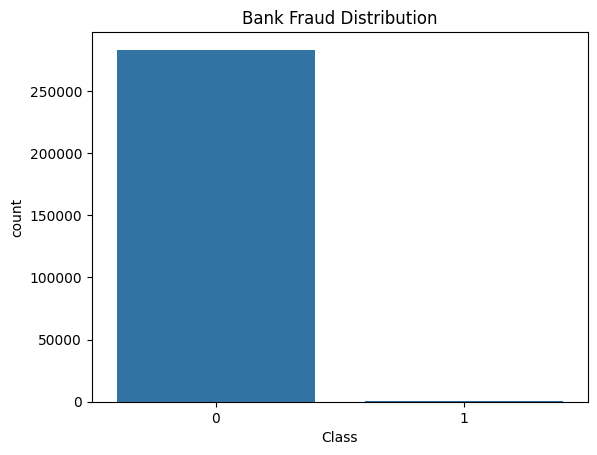

INFO: Before SMOTE: {0: 226602, 1: 378}
INFO: After SMOTE: {0: 226602, 1: 226602}


In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))
from src.data_processing import load_data, clean_data, scale_features
from src.model_utils import prepare_for_modeling, handle_imbalance_smote
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load and Clean (Visible Task)
bank_df = clean_data(load_data('../data/raw/creditcard.csv'))

# 2. Scale features (Required for bank data)
bank_df = scale_features(bank_df, ['Amount', 'Time'])

# 3. Explicit EDA (Requested by tutor)
sns.countplot(x='Class', data=bank_df)
plt.title('Bank Fraud Distribution')
plt.show()

# 4. Visible SMOTE results
X_train, X_test, y_train, y_test = prepare_for_modeling(bank_df, 'Class')
X_res, y_res = handle_imbalance_smote(X_train, y_train)

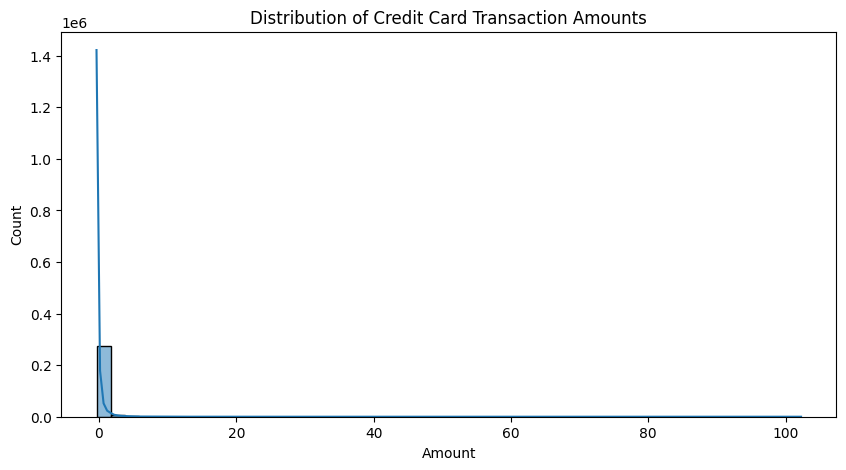

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


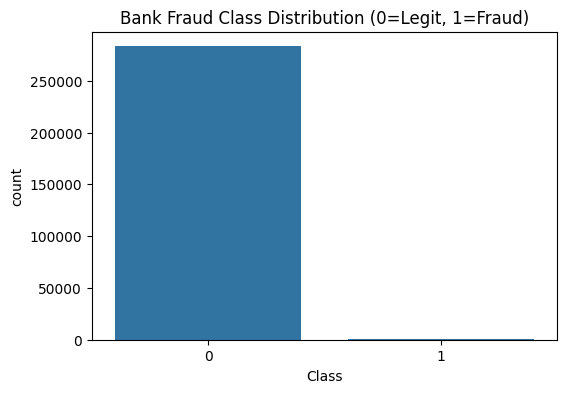

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


In [2]:
# Univariate: Transaction Amount distribution
plt.figure(figsize=(10, 5))
sns.histplot(bank_df['Amount'], bins=50, kde=True)
plt.title('Distribution of Credit Card Transaction Amounts')
plt.show()

# Bivariate: Class Distribution (Showing the extreme imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=bank_df)
plt.title('Bank Fraud Class Distribution (0=Legit, 1=Fraud)')
plt.show()

# Print exact percentages (Visibility requested)
print(bank_df['Class'].value_counts(normalize=True) * 100)

In [4]:
# Prepare and Scale Amount/Time (V1-V28 are already scaled by PCA)
bank_df = scale_features(bank_df, ['Amount', 'Time'])

# SMOTE execution (Shows Before/After counts)
X_train, X_test, y_train, y_test = prepare_for_modeling(bank_df, 'Class')
X_res, y_res = handle_imbalance_smote(X_train, y_train)

# Proof of successful balancing
print("New Class counts after SMOTE:", y_res.value_counts().to_dict())

INFO: Before SMOTE: {0: 226602, 1: 378}
INFO: After SMOTE: {0: 226602, 1: 226602}


New Class counts after SMOTE: {0: 226602, 1: 226602}


In [5]:
import sys, os
sys.path.append(os.path.abspath('../'))
from src.data_processing import load_data, clean_data, scale_features
from src.model_utils import prepare_for_modeling, handle_imbalance_smote
import seaborn as sns
import matplotlib.pyplot as plt

# Load the bank data
bank_df = clean_data(load_data('../data/raw/creditcard.csv'))

# Visible check of dtypes and missing values (Feedback requirement)
print(bank_df.info())
print("\nMissing values check:\n", bank_df.isnull().sum())

INFO: Successfully loaded ../data/raw/creditcard.csv
INFO: Removed 1081 duplicate rows.


<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 